In [ ]:
import seaborn as sns
import pandas as pd
import cv2
from google.colab.patches import cv2_imshow
import PIL
from scipy import misc
from google.colab import widgets

## Ejercicio 2.1

Implementar un aplicativo o notebook que levante una imagen en nivel de gris (o que la
convierta a YIQ y retenga solo el Y) y aplique el filtrado por convolución aquí visto:
1. Pasabajos: Plano, Bartlett 3x3, Gaussiano 5x5.
2. Detectores de bordes: Laplaciano v4, Sobel 4 orientaciones.
3. Pasabanda.
Respecto del “cierre” de la imagen cerca de los bordes, implementar la técnica no matemáticamente perfecta de “repetir” artificialmente filas o columnas cuando estas hagan
falta. Por ejemplo, si el kernel es 3x3 y estoy en la primera columna, y no hay ninguna
columna a la izquierda, entonces repito la primera columna como si estuviese en la
imagen original.

In [ ]:
imagen = cv2.imread('/content/drive/My Drive/Colab Notebooks/imagenes/f03bin1.bmp', cv2.IMREAD_GRAYSCALE)

<function matplotlib.pyplot.show>

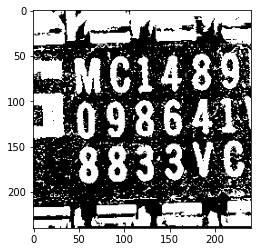

In [ ]:
plt.imshow(imagen, cmap='gray')
plt.show

In [ ]:
imagen.shape

(240, 240)

#### Filtros

In [ ]:
plano = np.outer(np.array([1/9, 1/9, 1/9]), np.array([1/9, 1/9, 1/9]))
plano

array([[0.01234568, 0.01234568, 0.01234568],
       [0.01234568, 0.01234568, 0.01234568],
       [0.01234568, 0.01234568, 0.01234568]])

In [ ]:
bartlett = np.outer(np.array([1, 2, 1]), np.array([1, 2, 1]))
bartlett

array([[1, 2, 1],
       [2, 4, 2],
       [1, 2, 1]])

In [ ]:
bartlett = bartlett/16

In [ ]:
gaussiano = np.outer(np.array([1,4,6,4,1]), np.array([1,4,6,4,1]))
gaussiano

array([[ 1,  4,  6,  4,  1],
       [ 4, 16, 24, 16,  4],
       [ 6, 24, 36, 24,  6],
       [ 4, 16, 24, 16,  4],
       [ 1,  4,  6,  4,  1]])

In [ ]:
gaussiano = gaussiano/256

In [ ]:
laplacev4 = np.array([[0, -1, 0], [-1, 4, -1], [0, -1, 0]])
laplacev4

array([[ 0, -1,  0],
       [-1,  4, -1],
       [ 0, -1,  0]])

In [ ]:
sobel_este = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
sobel_este

array([[-1,  0,  1],
       [-2,  0,  2],
       [-1,  0,  1]])

In [ ]:
sobel_oeste = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]])
sobel_oeste

array([[ 1,  0, -1],
       [ 2,  0, -2],
       [ 1,  0, -1]])

In [ ]:
sobel_norte = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
sobel_norte

array([[-1, -2, -1],
       [ 0,  0,  0],
       [ 1,  2,  1]])

In [ ]:
sobel_sur = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
sobel_sur

array([[ 1,  2,  1],
       [ 0,  0,  0],
       [-1, -2, -1]])

In [ ]:
import math
math.floor(gaussiano.shape[0]/2)

2

In [ ]:
def convolucion(imagen, kernel):
  top = math.floor(kernel.shape[0]/2)
  side = math.floor(kernel.shape[1]/2)
  imagen_nueva = np.zeros(imagen.shape)
  (ilim, jlim) = np.shape(kernel)
  (dim_x, dim_y) = np.shape(imagen)
  #agrego padding
  imagen = cv2.copyMakeBorder(imagen,top,top,side,side,cv2.BORDER_REPLICATE)
  
  for i in range(dim_x):
    for j in range(dim_y):
      imagen_entry = imagen[i:i+ilim, j:j+jlim]
      valor = np.sum(imagen_entry*kernel)
      imagen_nueva[i, j] = valor
  return imagen_nueva

,
,
,


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Antes


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Después


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

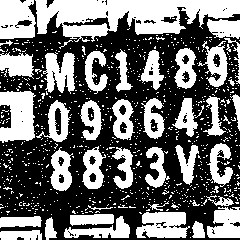

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

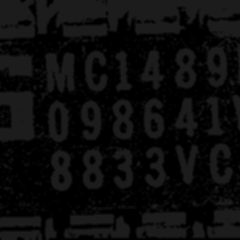

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

(240, 240)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

(240, 240)


<IPython.core.display.Javascript object>

In [ ]:
#@title Aplicar Filtro{ run: "auto" }
kernel = plano #@param ["plano", "bartlett", "gaussiano", "laplacev4", "sobel_este", "sobel_oeste", "sobel_norte", "sobel_sur"] {type:"raw", allow-input: true}
imagen_nueva = convolucion(imagen, kernel)
#creamos la grilla
grid = widgets.Grid(3, 2)

#ahora rellenamos las celdas
with grid.output_to(0, 0):
  print("Antes")
  
with grid.output_to(0, 1):
  print("Después")

with grid.output_to(1, 0):
  cv2_imshow(imagen)
  
with grid.output_to(1, 1):
  cv2_imshow(imagen_nueva)

with grid.output_to(2, 0):
  print(imagen.shape)
  
with grid.output_to(2, 1):
  print(imagen_nueva.shape)

## Ejercicio 2.2
Desarrollar un aplicativo o notebook que implemente los conceptos de morfología en niveles de gris aquí descriptos, con un elemento estructurante3x3. El mismo incluirá las siguientes funciones:-Erosión (tomar el mínimo valor de luminancia de la vecindad).

- Dilatación (máximo)
- Apertura, cierre, borde morfológico
- Mediana 
- Top-hat

Incluir la capacidad de copiar la componente de la imagen procesada en la componente original, para poder aplicar dos o más filtrados en secuencia

<function matplotlib.pyplot.show(*args, **kw)>

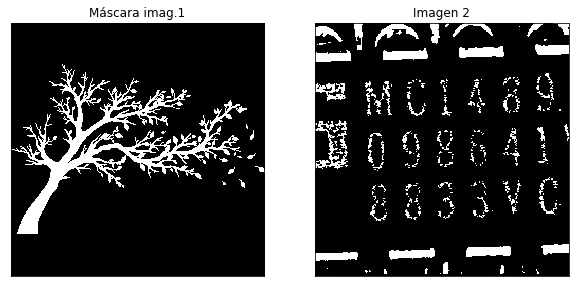

In [ ]:
# Para el caso de una imagen que no se encuentre binarizada.
# Carga de la imagen a utilizar y realización de thresholding, se binariza la imagen: todos los 
# valores por debajo de 230 se los considera "blancos", y los que están por arriba se los considerará "negros".
imagen1 = cv2.imread('C:\\Users\\rubin\\OneDrive\\Desktop\\image.jpg', cv2.IMREAD_GRAYSCALE) #Convierte la imagen a escala de grises
_, mask = cv2.threshold(imagen1, 230, 255, cv2.THRESH_BINARY_INV) 

imagen2 = cv2.imread('C:\\Users\\rubin\\OneDrive\\Desktop\\imagen.jpg')

titles = ["Máscara imag.1","Imagen 2"]
images = [mask, imagen2]

# Se realiza el plot de la imagen y de la máscara.
plt.figure (figsize=([10, 10]))
for i in range(2):
    plt.subplot(1, 2, i+1), plt.imshow(images[i], "gray")
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show

## Dilatación

<function matplotlib.pyplot.show(*args, **kw)>

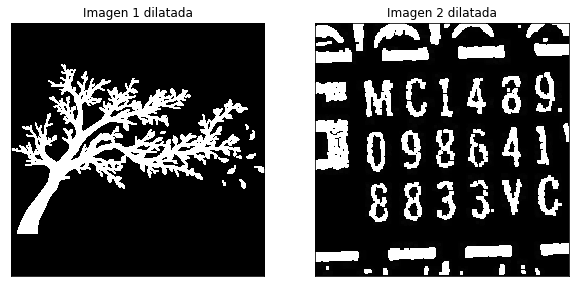

In [ ]:
# Se crea el kernel 3x3
kernel = np.ones ((3,3), np.uint8)
    
# Se realiza la dilatación de la máscara o de la imagen (según el caso)
dilatacion = cv2.dilate (mask, kernel)
dilatacion2 = cv2.dilate (imagen2, kernel)
title = ["Imagen 1 dilatada", "Imagen 2 dilatada"]
image = [dilatacion, dilatacion2]

# Se realiza el plot de la máscara y su imagen dilatada
plt.figure (figsize=([10, 10]))
for i in range (2):   
    plt.subplot (1, 2, i+1), plt.imshow (image[i], "gray")
    plt.title (title[i])
    plt.xticks ([]),plt.yticks([])
plt.show   

## Erosión

<function matplotlib.pyplot.show(*args, **kw)>

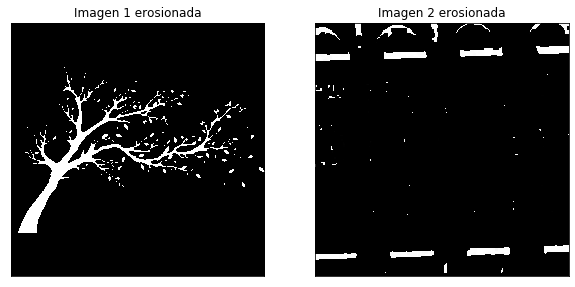

In [ ]:
# Se realiza la dilatación de la máscara o de la imagen (según el caso)
erosion = cv2.erode (mask, kernel)
erosion2 = cv2.erode (imagen2, kernel)
title = ["Imagen 1 erosionada", "Imagen 2 erosionada"]
image = [erosion, erosion2]
    
# Se realiza el plot de la máscara y su imagen dilatada
plt.figure (figsize=([10, 10]))
for i in range (2):     
    plt.subplot (1, 2, i+1), plt.imshow (image[i], "gray")
    plt.title (title[i])
    plt.xticks ([]),plt.yticks([])
plt.show   

## Apertura y Cierre

In [ ]:
# Se crea el kernel 3x3.
kernel = np.ones ((3,3), np.uint8)

# Apertura.
opening = cv2.morphologyEx (mask, cv2.MORPH_OPEN, kernel)
opening2 = cv2.morphologyEx (imagen2, cv2.MORPH_OPEN, kernel)

# Cierre.
closing = cv2.morphologyEx (mask, cv2.MORPH_CLOSE, kernel)
closing2 = cv2.morphologyEx (imagen2, cv2.MORPH_CLOSE, kernel)

<function matplotlib.pyplot.show(*args, **kw)>

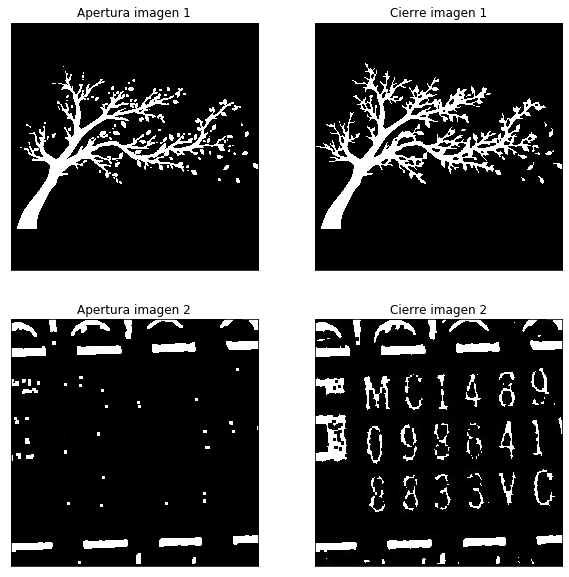

In [ ]:
titles = ["Apertura imagen 1", "Cierre imagen 1", "Apertura imagen 2", "Cierre imagen 2"]
images = [opening, closing, opening2, closing2]

plt.figure (figsize=([10, 10]))
for i in range(4):
    plt.subplot(2, 2, i+1), plt.imshow(images[i], "gray")
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show

Otra forma de realizar la apertura de una imagen es realizando la erosión de la imagen seguida por la dilatación de la misma. 
De la misma manera, otra manera de realizar el cierre de una imagen, es realizando la dilatación de la misma seguida por una erosión.
A continuación se realizaran esas dos operaciones, y se verificará si las nuevas imágenes obtenidas son las mismas que las imágenes obtenidas con la función
de apertura y cierre de la librería openCV (cv2).

<function matplotlib.pyplot.show(*args, **kw)>

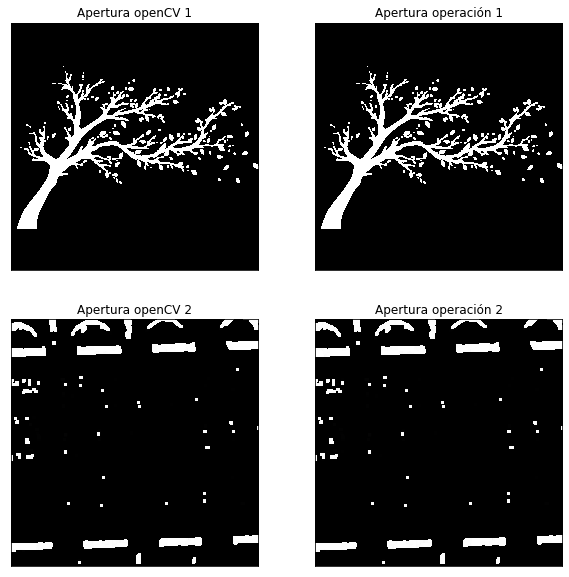

In [ ]:
# Apertura (erosión seguida por dilatación).
# A las imágenes ya erosionadas (erosion y erosion2) se les realiza la dilatación.

apertura = cv2.dilate (erosion, kernel)
apertura2 = cv2.dilate (erosion2, kernel)

titles = ["Apertura openCV 1", "Apertura operación 1", "Apertura openCV 2", "Apertura operación 2"]
images = [opening, apertura, opening2, apertura2]

plt.figure (figsize=([10, 10]))
for i in range (4):       
    plt.subplot (2, 2, i+1), plt.imshow (images[i], "gray")
    plt.title (titles[i])
    plt.xticks ([]),plt.yticks([])
plt.show  

<function matplotlib.pyplot.show(*args, **kw)>

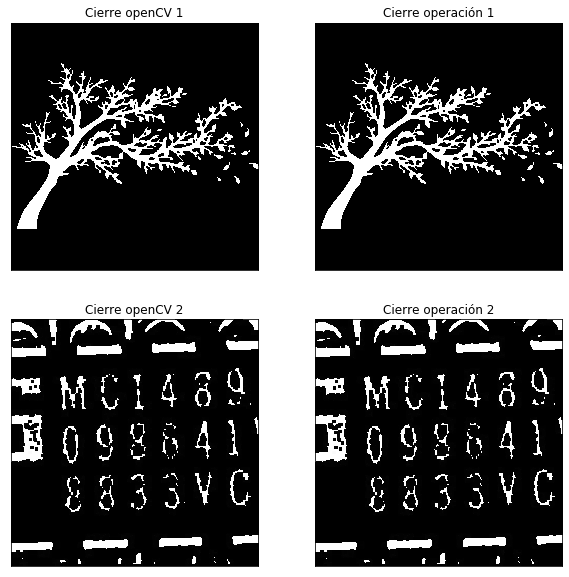

In [ ]:
# Cierre (dilatación seguida por erosión).
# A las imágenes ya dilatadas (dilatacion y dilatacion2) se les realiza la erosión.

cierre = cv2.erode (dilatacion, kernel)
cierre2 = cv2.erode (dilatacion2, kernel)

titles = ["Cierre openCV 1", "Cierre operación 1", "Cierre openCV 2", "Cierre operación 2"]
images = [closing, cierre, closing2, cierre2]

plt.figure (figsize=([10, 10]))
for i in range (4):      
    plt.subplot (2, 2, i+1), plt.imshow (images[i], "gray")
    plt.title (titles[i])
    plt.xticks ([]),plt.yticks([])
plt.show  

### Conclusión

Se puede ver que efectivamente, las imágenes son iguales. Tanto las realizadas con la librería de openCV como las que fueron hechas por la combinación de operaciones.

## Borde morfológico

In [ ]:
mg = cv2.morphologyEx(mask, cv2.MORPH_GRADIENT, kernel)
mg2 = cv2.morphologyEx(imagen2, cv2.MORPH_GRADIENT, kernel)

<function matplotlib.pyplot.show(*args, **kw)>

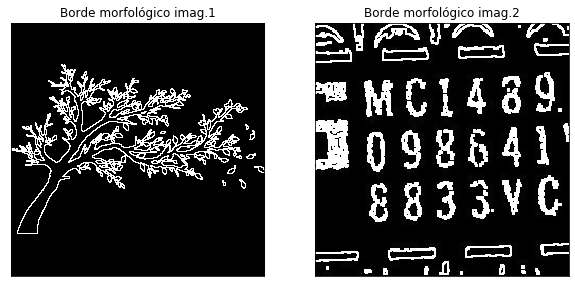

In [ ]:
titles = ["Borde morfológico imag.1", "Borde morfológico imag.2"]
images = [mg, mg2]

plt.figure (figsize=([10, 10]))
for i in range(2):
    plt.subplot(1, 2, i+1), plt.imshow(images[i], "gray")
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show

De la misma manera que se hizo anteriormente, el gradiente se puede realizar empleando opercaiones: imagen dilatada menos la erosionada.
Por lo tanto, se hará dicha operación a continuación y se verificará que las imágenes son las mismas que las obtenidas con la librería openCV.

<function matplotlib.pyplot.show(*args, **kw)>

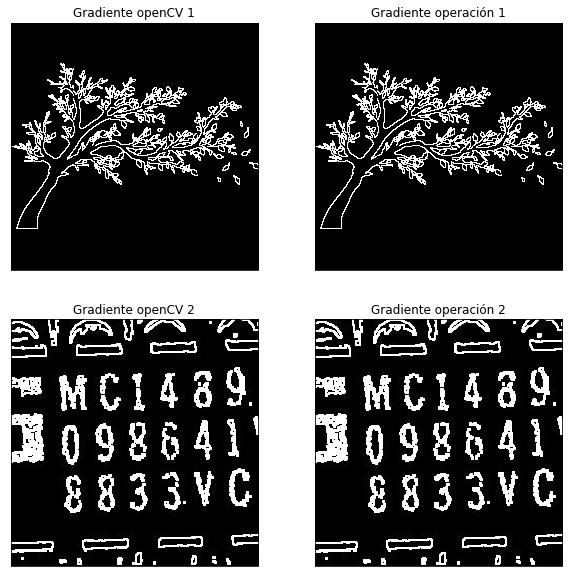

In [ ]:
grad = dilatacion - erosion
grad2 = dilatacion2- erosion2

titles = ["Gradiente openCV 1", "Gradiente operación 1", "Gradiente openCV 2", "Gradiente operación 2"]
images = [mg, grad, mg2, grad2]

plt.figure (figsize=([10, 10]))
for i in range(4):
    plt.subplot(2, 2, i+1), plt.imshow(images[i], "gray")
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show

### Conclusión
Nuevamente se puede apreciar que las imágenes obtenidas empleando la librería openCV y las que se obtuvieron realizando operaciones, son las mismas.

*Hay otros procedimientos que se pueden realizar:*
- **Borde exterior**, la forma de hacerlo es: a la imagen ya dilatada se le resta la imagen original.
- **Borde interior**, lo que se realiza es: a la imagen original se le resta la imagen que fue erosionada anteriormente.

A continuación se llevaran a cabo dichas operaciones.

<function matplotlib.pyplot.show(*args, **kw)>

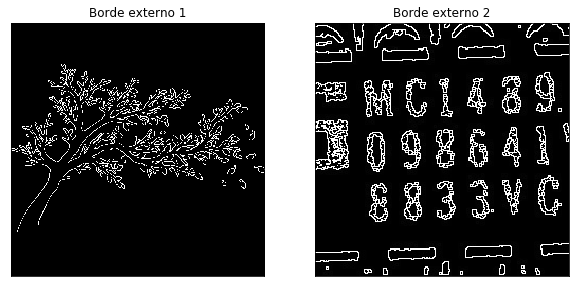

In [ ]:
# Borde exterior (dilatación menos original).
# Para el caso de la primera imagen, se restará la imagen dilatacion menos la máscara (que se emplea como si fuera la imagen original), dilatacion - mask.
# Para el caso de la segunda imagen se hará: dilatacion2 - imagen2.

borde_ext = dilatacion - mask
borde_ext2 = dilatacion2- imagen2

titles = ["Borde externo 1", "Borde externo 2"]
images = [borde_ext, borde_ext2]

plt.figure (figsize=([10, 10]))
for i in range(2):
    plt.subplot(1, 2, i+1), plt.imshow(images[i], "gray")
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

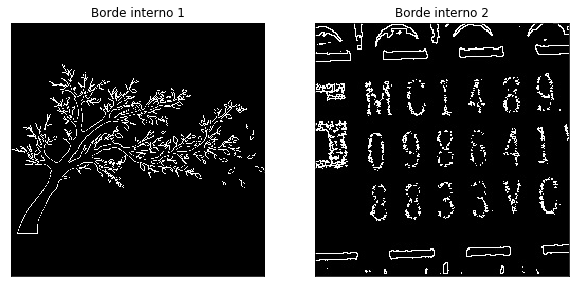

In [ ]:
# Borde interior (original menos erosión).
# Para el caso de la primera imagen, se restará la máscara (que se emplea como si fuera la imagen original) menos la imagen erosion, mask - erosion.
# Para el caso de la segunda imagen se hará: imagen2 - erosion2.

borde_int = mask - erosion
borde_int2 = imagen2 - erosion2

titles = ["Borde interno 1", "Borde interno 2"]
images = [borde_int, borde_int2]

plt.figure (figsize=([10, 10]))
for i in range(2):
    plt.subplot(1, 2, i+1), plt.imshow(images[i], "gray")
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show

## Top-hat

In [ ]:
# Se utiliza el mismo kernel creado anteriormente. 
th = cv2.morphologyEx (mask, cv2.MORPH_TOPHAT, kernel)
th2 = cv2.morphologyEx (imagen2, cv2.MORPH_TOPHAT, kernel)

<function matplotlib.pyplot.show(*args, **kw)>

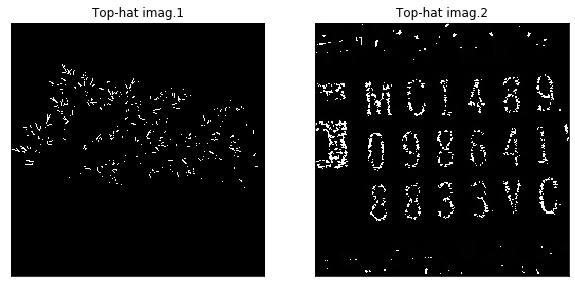

In [ ]:
titles = ["Top-hat imag.1", "Top-hat imag.2"]
images = [th, th2]

plt.figure (figsize=([10, 10]))
for i in range(2):
    plt.subplot(1, 2, i+1), plt.imshow(images[i], "gray")
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show

## Mediana

<function matplotlib.pyplot.show(*args, **kw)>

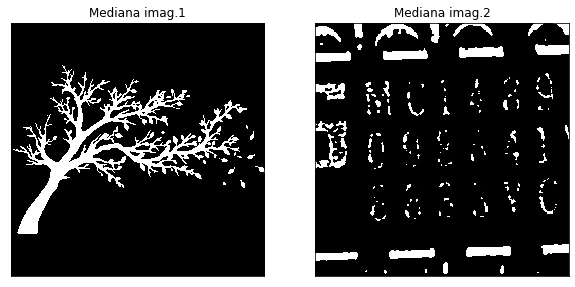

In [ ]:
mediana = cv2.medianBlur (mask, 3)
mediana2 = cv2.medianBlur (imagen2, 3)

titles = ["Mediana imag.1", "Mediana imag.2"]
images = [mediana, mediana2]

plt.figure (figsize=([10, 10]))
for i in range (2):      
    plt.subplot (1, 2, i+1), plt.imshow (images[i], "gray")
    plt.title (titles[i])
    plt.xticks ([]),plt.yticks([])
plt.show 

## Resumen
A conticuación se realizará el plot para la imagen 1 con todos los procedimeintos que se realizó a la misma. 

Lo mismo se hará para la imagen dos. 

Con el objetivo de poder tener una mejor visualización.

### Imagen 1

<function matplotlib.pyplot.show(*args, **kw)>

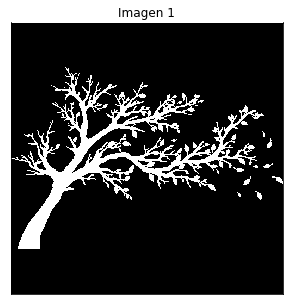

In [ ]:
# Ploteo imagen 1.
titles = ["Imagen 1"]
images = [mask]

plt.figure (figsize=([5, 5]))
for i in range(1):
    plt.subplot(1, 1, i+1), plt.imshow(images[i], "gray")
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

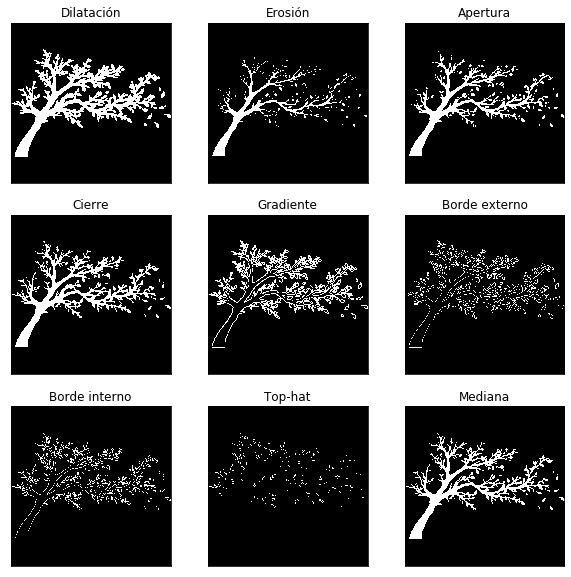

In [ ]:
# Ploteo procedimientos realizados a la imagen 1.
titles = ["Dilatación", "Erosión", "Apertura", "Cierre", "Gradiente", "Borde externo", "Borde interno", "Top-hat", "Mediana"]
images = [dilatacion, erosion, opening, closing, mg, borde_ext, borde_int, th, mediana]

plt.figure (figsize=([10, 10]))
for i in range(9):
    plt.subplot(3, 3, i+1), plt.imshow(images[i], "gray")
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show

### Imagen 2

<function matplotlib.pyplot.show(*args, **kw)>

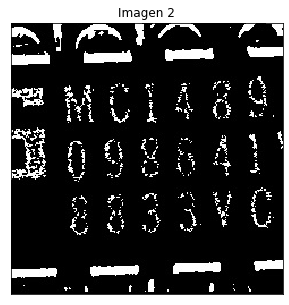

In [ ]:
# Ploteo imagen 2.
titles = ["Imagen 2"]
images = [imagen2]

plt.figure (figsize=([5, 5]))
for i in range(1):
    plt.subplot(1, 1, i+1), plt.imshow(images[i], "gray")
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

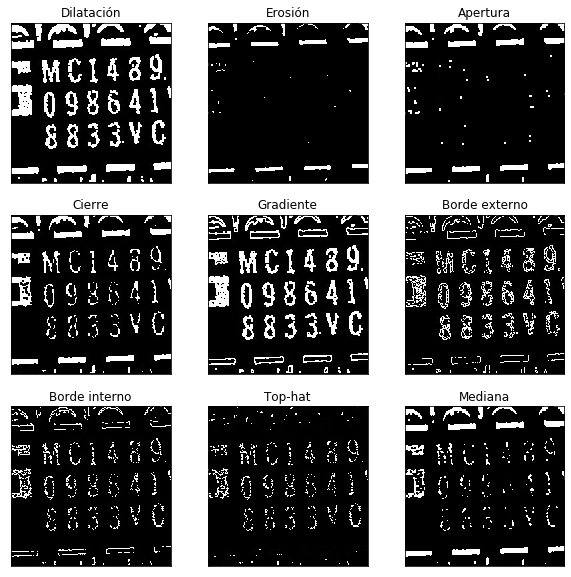

In [ ]:
# Ploteo procedimientos realizados a la imagen 2.
titles = ["Dilatación", "Erosión", "Apertura", "Cierre", "Gradiente", "Borde externo", "Borde interno", "Top-hat", "Mediana"]
images = [dilatacion2, erosion2, opening2, closing2, mg2, borde_ext2, borde_int2, th2, mediana2]

plt.figure (figsize=([10, 10]))
for i in range(9):
    plt.subplot(3, 3, i+1), plt.imshow(images[i], "gray")
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show